Accuracy: 0.9039199561403509
Precision: 0.9574000878348704
Recall: 0.9410071942446043
F1 Score: 0.9491328640882374
Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.16      0.14       346
           1       0.96      0.94      0.95      6950

    accuracy                           0.90      7296
   macro avg       0.54      0.55      0.54      7296
weighted avg       0.92      0.90      0.91      7296

Confusion Matrix:
[[  55  291]
 [ 410 6540]]


C:\Users\rogel\AppData\Local\Temp\ipykernel_20644\78373903.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['importance'], y=feature_importances.index, palette='viridis')


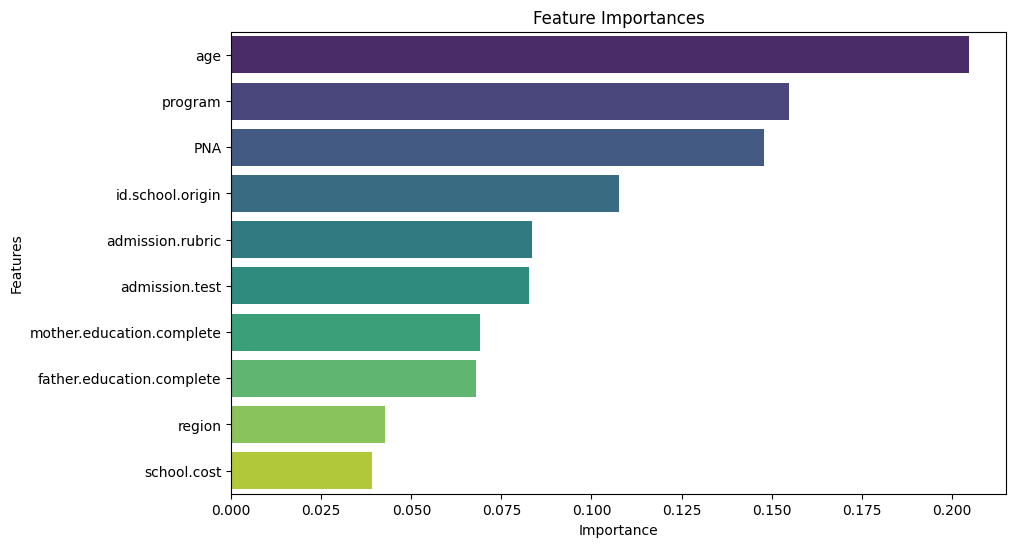

In [6]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


# Load the data
data_path = './data/label_encoded_scaled_data.csv'  # Replace with the correct path
data = pd.read_csv(data_path)

# Remove unnecessary columns
data = data.drop(['dropout.semester'], axis=1)

# Verify the nature of the target variable
target_column = 'retention'
y = data[target_column]

# If 'retention' is not categorical, convert it
if y.dtype != 'object' and len(y.unique()) > 20:
    y = (y > y.median()).astype(int)  # Convert to binary based on the median

# Use LabelEncoder if 'retention' is categorical
y = LabelEncoder().fit_transform(y)

# Separate the features
X = data.drop(target_column, axis=1)

# Select top features based on previous importance scores
important_features = [
    'admission.test', 'id.school.origin', 'PNA', 'admission.rubric', 'age', 
    'region', 'school.cost', 'father.education.complete', 'program',
    'mother.education.complete'
]
X_important = X[important_features]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTEENN to balance the training set
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForestClassifier with class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train_resampled)
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=important_features, columns=['importance']).sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve
import numpy as np

# Train a GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train_resampled)
y_pred_proba = gb_model.predict_proba(X_test_scaled)[:, 1]

# Find the optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

# Predict with the new threshold
y_pred_adjusted = (y_pred_proba >= best_threshold).astype(int)

# Evaluate the model with the adjusted threshold
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))


Accuracy: 0.9527138157894737
Precision: 0.9527073337902673
Recall: 1.0
F1 Score: 0.9757809757809758
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       346
           1       0.95      1.00      0.98      6950

    accuracy                           0.95      7296
   macro avg       0.98      0.50      0.49      7296
weighted avg       0.95      0.95      0.93      7296

Confusion Matrix:
[[   1  345]
 [   0 6950]]


In [13]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Rebalance the dataset using SMOTE
# Reshape y_train to match the number of samples in X_train_scaled
y_train_resampled = y_train.reshape(-1, 1)

# Rebalance the dataset using SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train_resampled)

# Reshape y_resampled back to 1D array
y_resampled = y_resampled.ravel()

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report_str}")
print("Confusion Matrix:")
print(conf_matrix)


ValueError: Found input variables with inconsistent numbers of samples: [24450, 17021]